<a href="https://colab.research.google.com/github/vinayakghatul/Aerofit_case_study/blob/main/Aerofit_Case_study_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset -
from google.colab import files

uploaded = files.upload()


Saving aerofit.csv to aerofit.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['aerofit.csv']))
df.head()

,Unnamed: 0,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,KP281,18,Male,14,Single,3,4,29562,112
1,1,KP281,19,Male,15,Single,2,3,31836,75
2,2,KP281,19,Female,14,Partnered,4,3,30699,66
3,3,KP281,19,Male,12,Single,3,3,32973,85
4,4,KP281,20,Male,13,Partnered,4,2,35247,47


### Aerofit dataset
Product Purchased:	KP281, KP481, or KP781 <br>
Age:	In years<br>
Gender:	Male/Female<br>
Education:	In years<br>
MaritalStatus:	Single or partnered<br>
Usage:	The average number of times the customer plans to use the treadmill each week.<br>
Income:	Annual income (in $)<br>
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.<br>
Miles:	The average number of miles the customer expects to walk/run each week.<br>

### Lets do some basic EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     180 non-null    int64 
 1   Product        180 non-null    object
 2   Age            180 non-null    int64 
 3   Gender         180 non-null    object
 4   Education      180 non-null    int64 
 5   MaritalStatus  180 non-null    object
 6   Usage          180 non-null    int64 
 7   Fitness        180 non-null    int64 
 8   Income         180 non-null    int64 
 9   Miles          180 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 14.2+ KB


In [5]:
df.isnull().sum()

Unnamed: 0       0
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Data types are clearly defined and as per requirement<br>
No null/NaN values<br>

In [6]:
df.head()

,Unnamed: 0,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,KP281,18,Male,14,Single,3,4,29562,112
1,1,KP281,19,Male,15,Single,2,3,31836,75
2,2,KP281,19,Female,14,Partnered,4,3,30699,66
3,3,KP281,19,Male,12,Single,3,3,32973,85
4,4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [8]:
df['Product'].nunique()

3

In [9]:
#wide range of values hence not using value_counts to display
df['Age'].nunique()

32

In [10]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [11]:
df['Gender'].nunique()

2

In [12]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [13]:
df['Education'].nunique()

8

In [14]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [15]:
df['MaritalStatus'].nunique()

2

In [16]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [17]:
df['Fitness'].nunique()

5

In [18]:
#Wide range of values hence not using value counts
df['Income'].nunique()

62

62

In [20]:
#wide range of values hence not using value_counts function
df['Miles'].nunique()

37

In [21]:
#describe data with count,max,min deviation etc
df.describe().round(2)

,Unnamed: 0,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00,180.00
mean,89.50,28.79,15.57,3.46,3.31,53719.58,103.19
std,52.11,6.94,1.62,1.08,0.96,16506.68,51.86
min,0.00,18.00,12.00,2.00,1.00,29562.00,21.00
25%,44.75,24.00,14.00,3.00,3.00,44058.75,66.00
50%,89.50,26.00,16.00,3.00,3.00,50596.50,94.00
75%,134.25,33.00,16.00,4.00,4.00,58668.00,114.75
max,179.00,50.00,21.00,7.00,5.00,104581.00,360.00


### Outliers detection & analysis

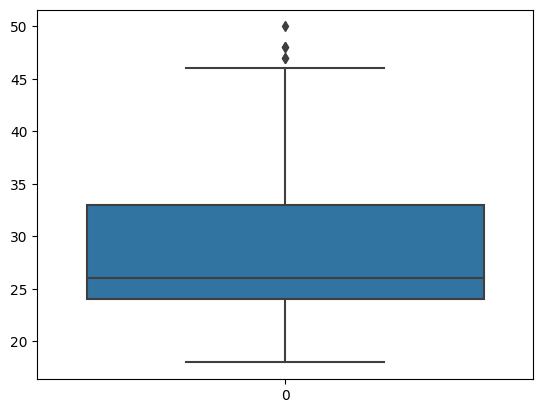

In [22]:
#Age
plot = sns.boxplot(df['Age'])
plt.show()

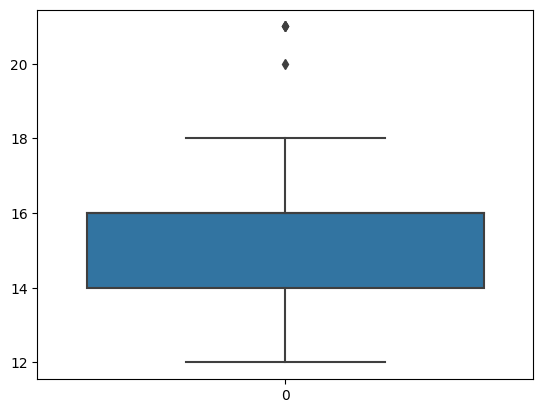

In [23]:
#Education
plot = sns.boxplot(df['Education'])
plt.show()

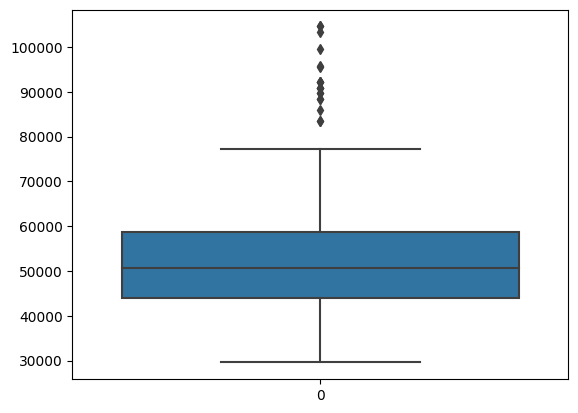

In [24]:
plot = sns.boxplot(df['Income'])
plt.show()

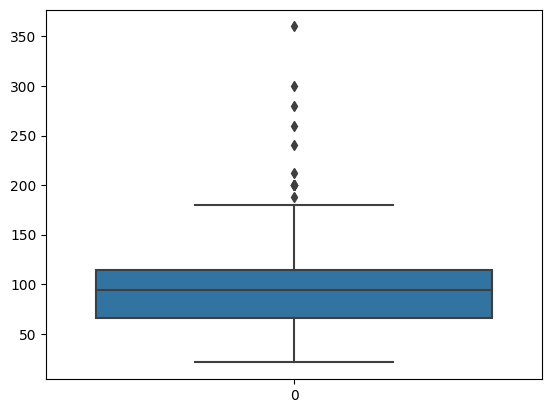

In [25]:
plot = sns.boxplot(df['Miles'])
plt.show()

In [26]:
df.head()

,Unnamed: 0,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,KP281,18,Male,14,Single,3,4,29562,112
1,1,KP281,19,Male,15,Single,2,3,31836,75
2,2,KP281,19,Female,14,Partnered,4,3,30699,66
3,3,KP281,19,Male,12,Single,3,3,32973,85
4,4,KP281,20,Male,13,Partnered,4,2,35247,47


### Data correlation - convert strings,objects to uniform int data

In [27]:
df_new = df.copy()
df_new.head()

,Unnamed: 0,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,KP281,18,Male,14,Single,3,4,29562,112
1,1,KP281,19,Male,15,Single,2,3,31836,75
2,2,KP281,19,Female,14,Partnered,4,3,30699,66
3,3,KP281,19,Male,12,Single,3,3,32973,85
4,4,KP281,20,Male,13,Partnered,4,2,35247,47


In [28]:
#Product values
df_new['Product'].replace(['KP281','KP481','KP781'],[0,1,2],inplace=True)

#Gender values
df_new['Gender'].replace(['Female','Male'],[0,1],inplace=True)

#Marital Status values
df_new['MaritalStatus'].replace(['Single','Partnered'],[0,1],inplace=True)

df_new.corr()

,Unnamed: 0,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Unnamed: 0,1.000000,0.925377,0.368723,0.200020,0.533645,0.054766,0.471248,0.526205,0.732982,0.510940
Product,0.925377,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.368723,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.200020,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.533645,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,0.054766,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.471248,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.526205,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.732982,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.510940,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


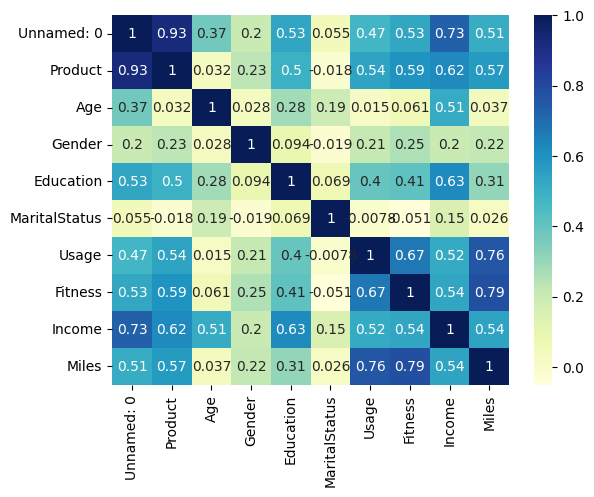

In [29]:
plot = sns.heatmap(df_new.corr(),cmap='YlGnBu',annot=True)
plt.show()

### Observations from above correlation map


1. Usage, fitness, income and miles are highly correlated with product purchase than other features
2. Marital status has extremely low impact/relation with product purchase
3. Expected number of miles has high correlation with fitness level
4. Age and Gender also hold low impact on product purchase
5. Education and incomes seems to have very good correlation
6. Age is also highly co-related with income as income grows with age

### Continous variables and its scatter plot
1. Age
2. Income
3. Miles

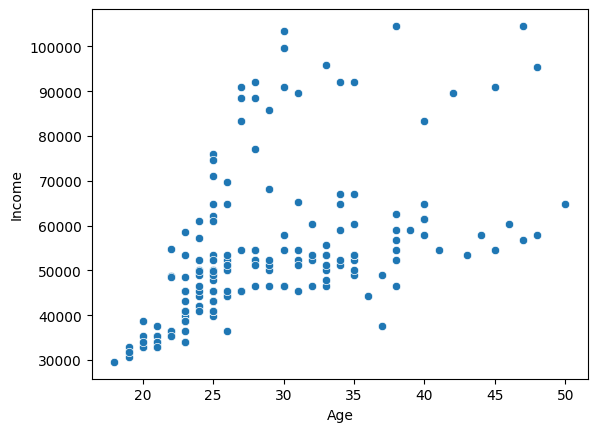

In [30]:
# Age vs Income
plot = sns.scatterplot(data=df_new,x=df_new['Age'],y=df_new['Income'])
plt.show()

* Income has grown with age but variance in income at higher is very high compared to low age group (less than 30).

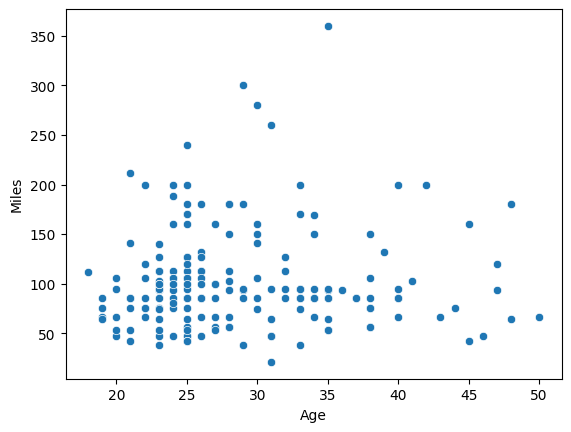

In [31]:
# Age vs Miles
plot = sns.scatterplot(data=df_new,x=df_new['Age'],y=df_new['Miles'])
plt.show()

* No specific pattern between age and miles.

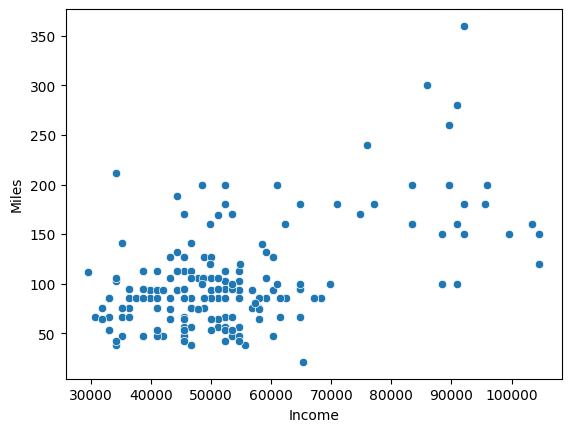

In [32]:
# Age vs Income
plot = sns.scatterplot(data=df_new,x=df_new['Income'],y=df_new['Miles'])
plt.show()

* Miles > 250 is observed only in high income group (>75000)

### Marginal & Conditional probabilities:
using crosstabs.


First we need to create range bins for following columns as these are continous variables/values
1. Age
2. Income
3. Miles

<Axes: xlabel='Age', ylabel='Density'>

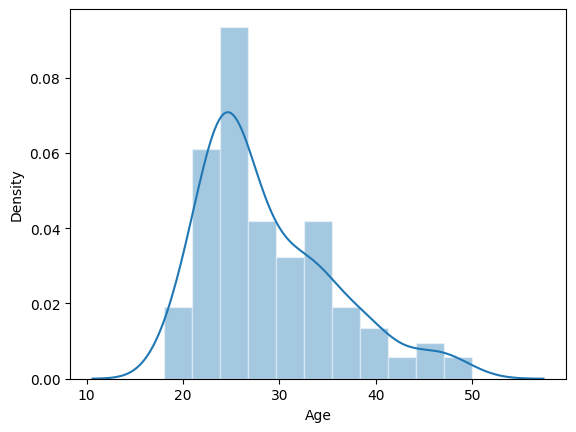

In [33]:
#Lets plot Age to understand the distribution

sns.histplot(
    df["Age"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

In [34]:
#Creating bins for Age with interval of 5
bins = [-1,20,25,30,35,40,55]
labels=['<20','20-25','25-30','30-35','35-40','40+']

df['Age_bins'] = pd.cut(df['Age'],bins=bins,labels=labels)
df.head()

,Unnamed: 0,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,4,KP281,20,Male,13,Partnered,4,2,35247,47,<20


<Axes: xlabel='Income', ylabel='Density'>

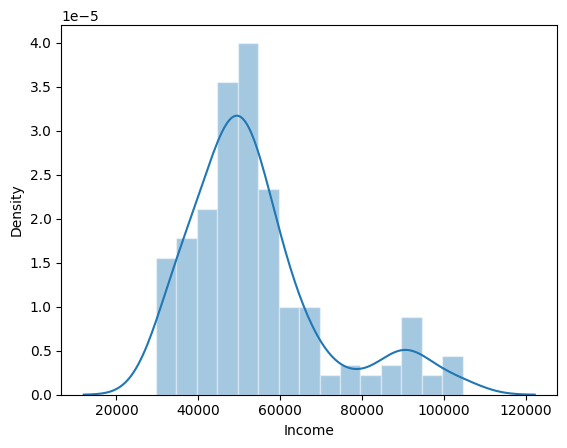

In [35]:
#Lets analyze Income column for create bins

sns.histplot(
    df["Income"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

In [36]:
#bins for Income column


bins = [-1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']

df['Income_bins'] = pd.cut(df['Income'],bins = bins,labels=labels)
df.head()

,Unnamed: 0,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000


<Axes: xlabel='Miles', ylabel='Density'>

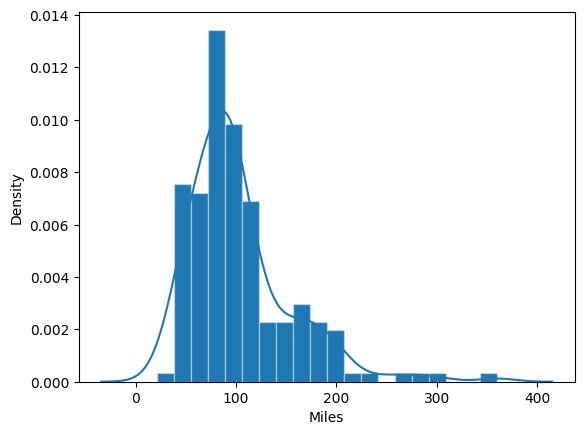

In [37]:
#Lets analyze Miles column for distribution

sns.histplot(
    df["Miles"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=1, edgecolor=(1, 1, 1, .4),
)

In [38]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [39]:
#creating bins for Miles

bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Miles_bin'] = pd.cut(df['Miles'],bins=bins,labels=labels)
df.head()

,Unnamed: 0,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Miles_bin
0,0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


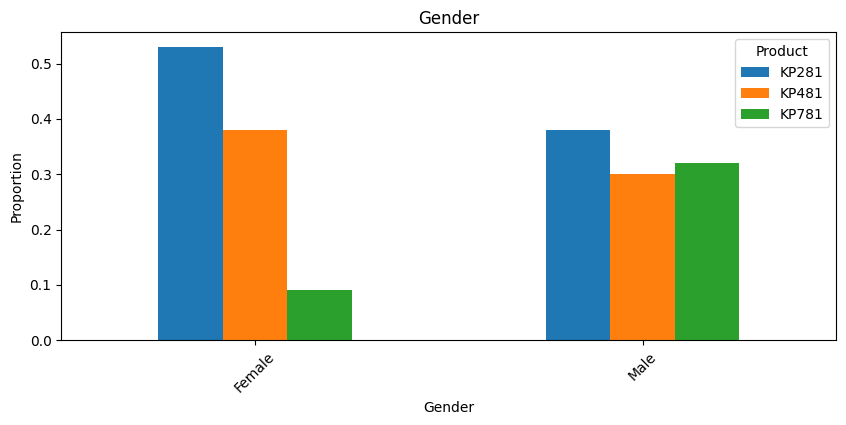

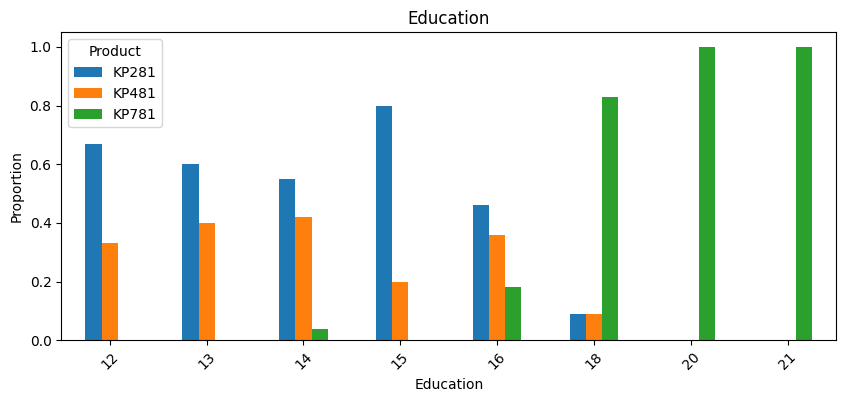

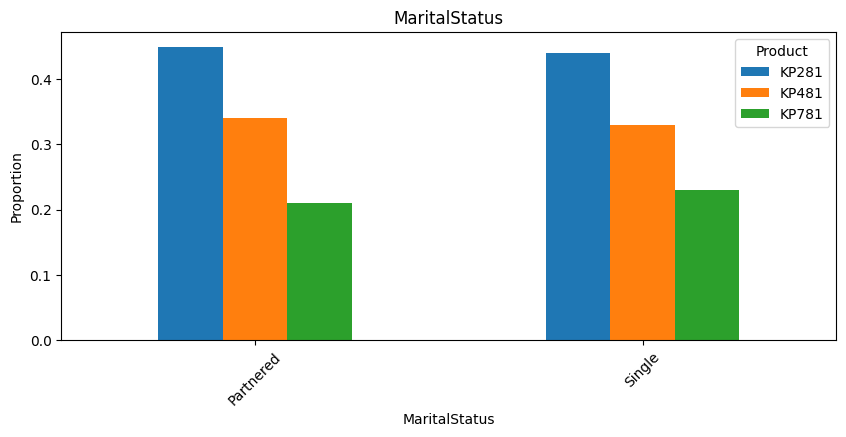

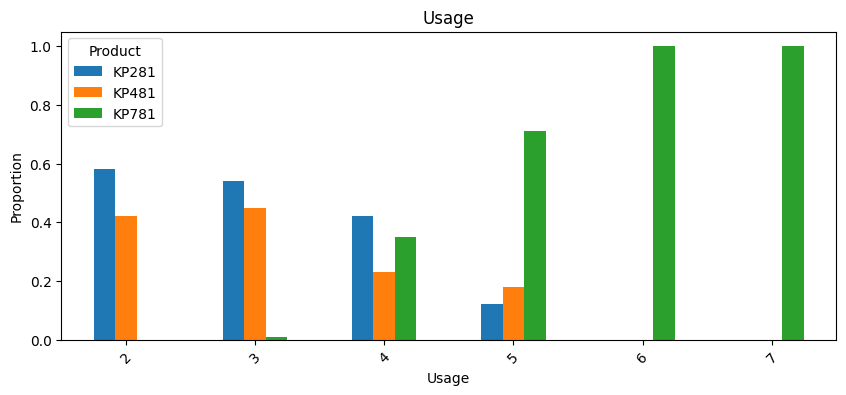

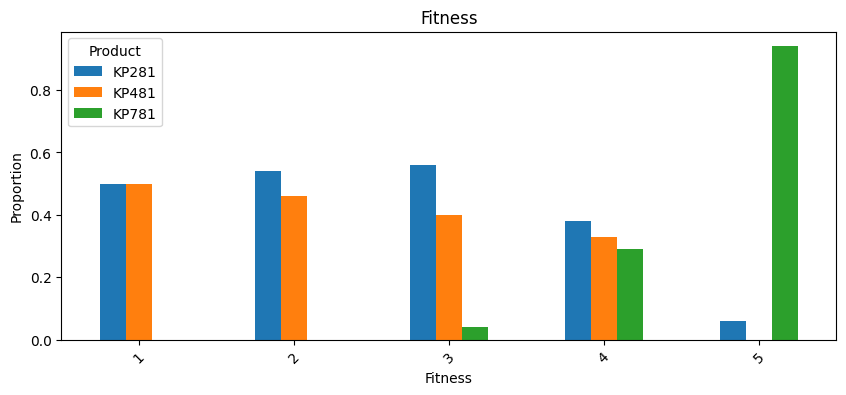

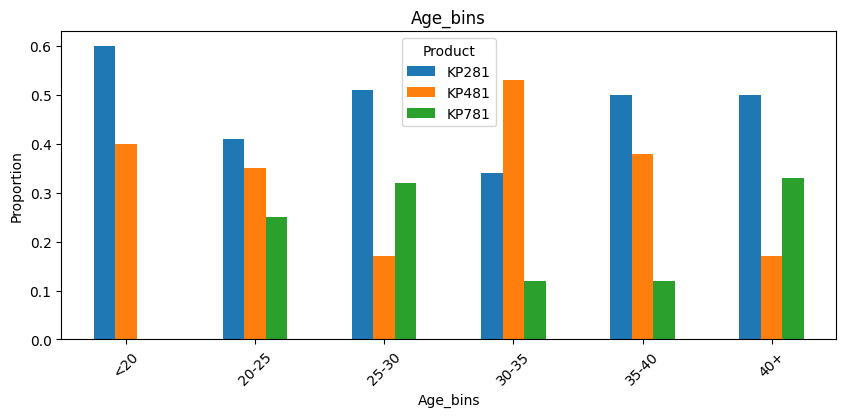

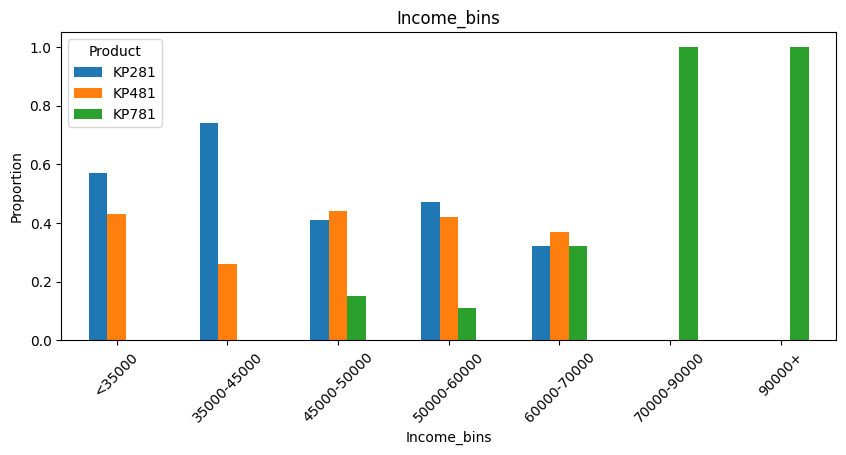

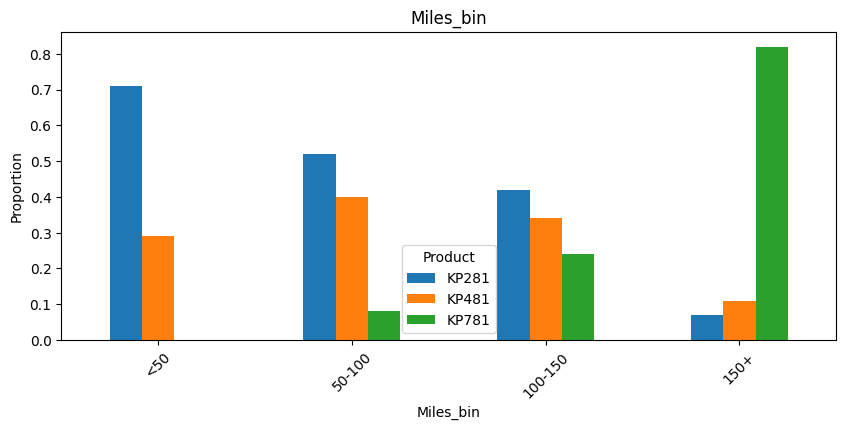

In [40]:
cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Miles_bin']
for i in cat_cols:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['Product']).\
                 div(pd.crosstab(df[df[i].notnull()][i],df['Product']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

##### Observation from above plots
1. There is equal distribution of all 3 models purchase among males but females tend to purchase KP281 model more than other top end models
2. Customers with higher education tend to purchase KP281 model whereas those below 16 education tend to purchase KP281 more often
3. Marital status doesn’t have any significant impact on customer's purchase
4. Usgae and expensive model purchase has linear relation
5. Customers with higher fitness level (5) are highly probable to make KP781 model purchase than remaining ones.
6. Customers with fitness less than equal to 3 are inclined towards KP281 and KP481 models
7. As per expection, people with higher income(>70000) tend to purchase expensive model.

### Conditional & Marginal probability:


In [41]:
from IPython.display import display
for i in cat_cols:
  print('Table for',str(i),'vs Treadmill Product')
  display(pd.crosstab(df[i], df['Product'], margins=True))
  print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781,All
Education,,,,
12,2,1,0,3
13,3,2,0,5
14,30,23,2,55
15,4,1,0,5
16,39,31,15,85
18,2,2,19,23
20,0,0,1,1
21,0,0,3,3
All,80,60,40,180




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781,All
Usage,,,,
2,19,14,0,33
3,37,31,1,69
4,22,12,18,52
5,2,3,12,17
6,0,0,7,7
7,0,0,2,2
All,80,60,40,180




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781,All
Fitness,,,,
1,1,1,0,2
2,14,12,0,26
3,54,39,4,97
4,9,8,7,24
5,2,0,29,31
All,80,60,40,180




Table for Age_bins vs Treadmill Product


Product,KP281,KP481,KP781,All
Age_bins,,,,
<20,6,4,0,10
20-25,28,24,17,69
25-30,21,7,13,41
30-35,11,17,4,32
35-40,8,6,2,16
40+,6,2,4,12
All,80,60,40,180




Table for Income_bins vs Treadmill Product


Product,KP281,KP481,KP781,All
Income_bins,,,,
<35000,8,6,0,14
35000-45000,26,9,0,35
45000-50000,14,15,5,34
50000-60000,26,23,6,55
60000-70000,6,7,6,19
70000-90000,0,0,11,11
90000+,0,0,12,12
All,80,60,40,180




Table for Miles_bin vs Treadmill Product


Product,KP281,KP481,KP781,All
Miles_bin,,,,
<50,12,5,0,17
50-100,50,39,8,97
100-150,16,13,9,38
150+,2,3,23,28
All,80,60,40,180


In [42]:
from IPython.display import display
for i in cat_cols:
  print('Table for',str(i),'vs Treadmill Product')
  display(pd.crosstab(df[i], df['Product'], margins=True,normalize='index'))
  print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222




Table for Age_bins vs Treadmill Product


Product,KP281,KP481,KP781
Age_bins,,,
<20,0.600000,0.400000,0.000000
20-25,0.405797,0.347826,0.246377
25-30,0.512195,0.170732,0.317073
30-35,0.343750,0.531250,0.125000
35-40,0.500000,0.375000,0.125000
40+,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222




Table for Income_bins vs Treadmill Product


Product,KP281,KP481,KP781
Income_bins,,,
<35000,0.571429,0.428571,0.000000
35000-45000,0.742857,0.257143,0.000000
45000-50000,0.411765,0.441176,0.147059
50000-60000,0.472727,0.418182,0.109091
60000-70000,0.315789,0.368421,0.315789
70000-90000,0.000000,0.000000,1.000000
90000+,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Miles_bin vs Treadmill Product


Product,KP281,KP481,KP781
Miles_bin,,,
<50,0.705882,0.294118,0.000000
50-100,0.515464,0.402062,0.082474
100-150,0.421053,0.342105,0.236842
150+,0.071429,0.107143,0.821429
All,0.444444,0.333333,0.222222


### Observations based on conditional and marginal probability

1) In all the tables, one can see the last row named All, it consists of the overall probabilities of purchases of those 3 treadmills, i.e. - Probability of purchase of KP281= 44.44%, KP481= 33.33% and KP781=22.22%

2) P(KP281|Education=12) = 66.66% and P(KP781|Education=18) = 82.6%
   P(KP781|Education=20) = P(KP781|Education=21) = 100%

3) P(KP281|Usage=2) = 57.57%, P(KP781|Usage=6)=P(KP781|Usage=7) = 100%

4) P(KP481|Fitness=2) = 46.15%

5) P(KP481|Age_bins=30-35) = 53.12%

6) P(KP781|Income>70000) = 100% and P(KP481|Income_bins=45000-50000) = 44.11%

7) P(KP281|Mile_bins<50) = 70.5% and  P(KP781|Mile_bins>150)=82.1%

In [43]:
df.head()

,Unnamed: 0,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Miles_bin
0,0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


## Customer profiling

**Customer Profiles for KP781**
<br>

1) Only people having incomes greater than 70k have run over 220 miles and all of then use KP781.

2) Recommend KP781 if one or more conditions are satisfied along with a necessary condition of Income > 70000:-
<br>
    a) Education Level >= 18
    b) Usage days > = 5
    c) Fitness Levels = 5
    d) The person runs more than 150 miles(80% of them use KP781)

3) Never Recommend KP781 if one or more of these conditions are satisfied:-
<br>
    a) Education Levels < 14
    b) Fitness < 3
    c) Age < 20
    d)Income < 45000
    e) Miles run < 50

**Why very few women have bought the luxurious KP781 treadmill?**
<br>
Only 2 women have incomes over 70k which is certainly the reason for a large proportion of them not buying KP781(affordability).


**Note for below mentioned points**
KP281 and KP481 don't have much differences in their costs and the characteristics of customers who use them . Still a few of them have been identified but they need to be validated with an incremental data.

**Customer Profiles for KP281:**

1) Women having incomes below 70k and age > 40
<br>
2) Customers having income in range 60k-70k and usage days=3
<br>
3) Customers having income in range 45k-50k and usage days=2
<br>
4) Customers having income in range 35k-45k and usage days=4
<br>
5) Customers having income in range 50k-60k and usage days=4
<br>
6) Customers with Fitness=4, age closer to 40 and income 50k-60k
<br>
7) Customers with Education Level=16, Age>32 and income 45k-50k
<br>
8) Customers with Education Level=16, Age>45 and income 60k-70k
<br>
9) Customers with Age in 25-30 and 35-40 having incomes in range 35k-45k
<br>
10) Customers with 40+ Age and 60k-70k income
<br>
11) Women with incomes < 35k and whose miles run < 105
<br>
12) Customers with usages=5, incomes in range 35k-45k and who run more than 140 miles
<br>
13) Customers with Fitness=5, incomes < 70k and Incomes in 45k-50k
<br>
14) Customers with Education level=15 having incomes less than 35k
<br>
15) Customers with Usages=3, miles run < 70 and Age>40
<br>
16) Customers with Usages=2 and Age between 25-30


**Customer Profiles for KP481:**

1) Women having incomes below 70k and age between 32-37
<br>
2) Customers with age < 25, incomes in range 50-60k and the miles run is in the range 100-150
<br>
3) Customers with Fitness=4, age in range 25-32 and income 50k-60k
<br>
4) Customers with Education Level=16, Age< 22 and income 45k-50k
<br>
5) Customers with Education Level=16, Age< 35 and income 60k-70k
<br>
6) Customers with 35-40 Age and 60k-70k income
<br>
7) Women with incomes < 35k and whose miles run >105
<br>
8) Men with incomes 60k-70k and who tread in range 100-150 miles
<br>
9) Customers with Fitness=4, incomes < 45k-50k and who run more than 100 miles
<br>
10) Customers with Education level=13 having incomes in ranges 45-60k
<br>
11) Customers with Usages=2 and Age>40